In [1]:
# we import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

#here data.data gives 150 X 4 matrix of 150 examples sepal length, sepal width, petal length and petal width
#data.target gives output type of flower
# class 0 = setosa
# class 1 = versicolor 
# class 2 = virginica

# now we will amke dataframe and divide data in 80:20 for training and testing purpose
df = pd.DataFrame(data.data,columns=data.feature_names)
df['CLASS-OUTPUT'] = data.target  # adding output class to last column of data-set
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS-OUTPUT
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
x = data.data
y = data.target

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x)
x_new = pca.transform(x)

print("The size of input data after applying PCA:")
print(x_new.shape)

The size of input data after applying PCA:
(150, 2)


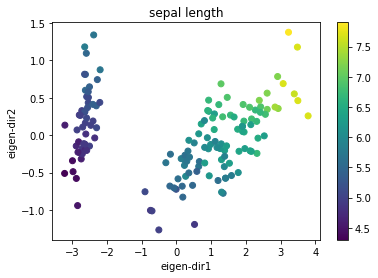

In [22]:
z = df.to_numpy()

plt.scatter(x_new[:, 0], x_new[:, 1], c = z[:, 0], cmap='viridis')
plt.colorbar()
plt.title('sepal length')
plt.xlabel('eigen-dir1')
plt.ylabel('eigen-dir2')
plt.show()

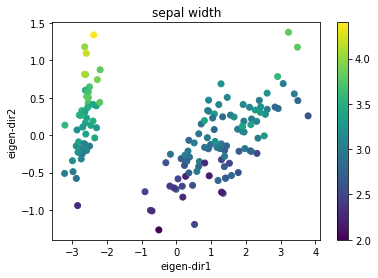

In [24]:
plt.scatter(x_new[:, 0], x_new[:, 1], c = z[:, 1], cmap='viridis')
plt.colorbar()
plt.title('sepal width')
plt.xlabel('eigen-dir1')
plt.ylabel('eigen-dir2')
plt.show()

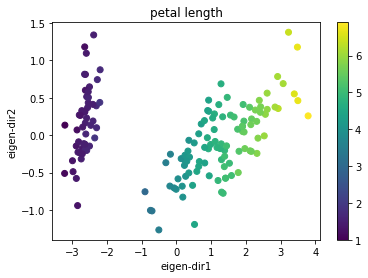

In [25]:
plt.scatter(x_new[:, 0], x_new[:, 1], c = z[:, 2], cmap='viridis')
plt.colorbar()
plt.title('petal length')
plt.xlabel('eigen-dir1')
plt.ylabel('eigen-dir2')
plt.show()

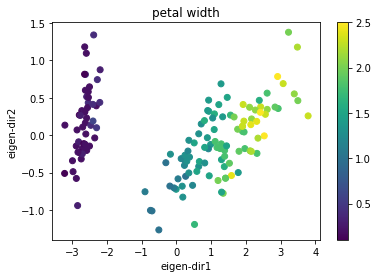

In [26]:
plt.scatter(x_new[:, 0], x_new[:, 1], c = z[:, 3], cmap='viridis')
plt.colorbar()
plt.title('petal width')
plt.xlabel('eigen-dir1')
plt.ylabel('eigen-dir2')
plt.show()

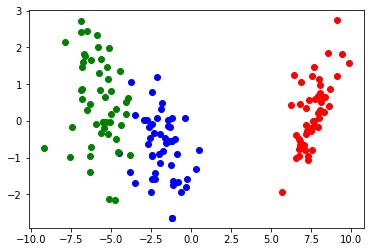

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ld = LinearDiscriminantAnalysis(n_components=2)
model = ld.fit(x, y)
ak = model.transform(x)

plt.scatter(ak[0:50,0], ak[0:50,1], color = 'red', label="class - 0")
plt.scatter(ak[50:100,0], ak[50:100,1], color = 'blue', label="class - 1")
plt.scatter(ak[100:150,0], ak[100:150,1], color = 'green', label="class - 2")


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


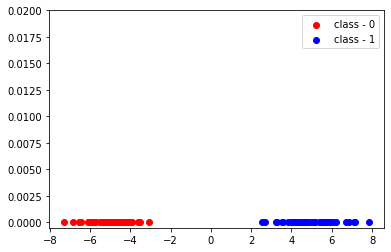

In [48]:
ld1 = LinearDiscriminantAnalysis(n_components=1)
model1 = ld.fit(ak[0:100], y[0:100])
ak1 = model1.transform(ak[0:100])

plt.scatter(ak1[0:50,0], y[0:50], color = 'red', label="class - 0")
plt.scatter(ak1[50:100,0], y[0:50], color = 'blue', label="class - 1")
plt.ylim(-0.0005, 0.02)
plt.legend()

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


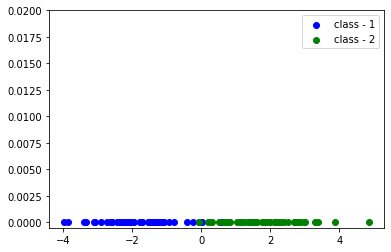

In [57]:
ld2 = LinearDiscriminantAnalysis(n_components=1)
model2 = ld.fit(ak[50:150], y[50:150])
ak2 = model2.transform(ak[50:150])

plt.scatter(ak2[0:50,0], y[0:50], color = 'blue', label="class - 1")
plt.scatter(ak2[50:100,0], y[0:50], color = 'green', label="class - 2")
plt.ylim(-0.0005, 0.02)
plt.legend()

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


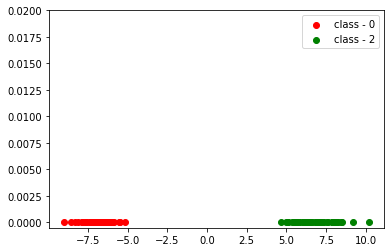

In [60]:
ld3 = LinearDiscriminantAnalysis(n_components=1)
model3 = ld.fit(np.concatenate((ak[0:50], ak[100:150]), axis=0), np.concatenate((y[0:50], y[100:150]), axis=0))
ak3 = model3.transform(np.concatenate((ak[0:50], ak[100:150]), axis=0))

plt.scatter(ak3[0:50,0], y[0:50], color = 'red', label="class - 0")
plt.scatter(ak3[50:100,0], y[0:50], color = 'green', label="class - 2")
plt.ylim(-0.0005, 0.02)
plt.legend()

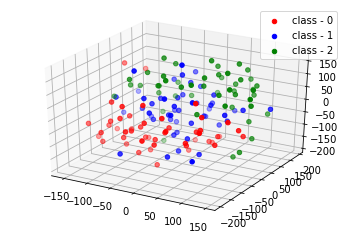

In [92]:
from sklearn.manifold import TSNE

model_ak = TSNE(n_components=3, metric= 'cityblock')
x_tsne = model_ak.fit_transform(x)

ax = plt.axes(projection='3d')
ax.scatter3D(x_tsne[0:50, 0], x_tsne[0:50, 1], x_tsne[0:50, 2], color = 'red', label="class - 0")
ax.scatter3D(x_tsne[50:100, 0], x_tsne[50:100, 1], x_tsne[50:100, 2], color = 'blue', label="class - 1")
ax.scatter3D(x_tsne[100:150, 0], x_tsne[100:150, 1], x_tsne[100:150, 2], color = 'green', label="class - 2")
ax.legend()

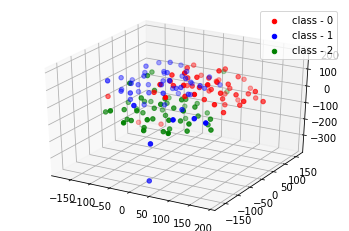

In [91]:
model_ak2 = TSNE(n_components=3, metric= 'correlation')
x_tsne2 = model_ak2.fit_transform(x)

ax = plt.axes(projection='3d')
ax.scatter3D(x_tsne2[0:50, 0], x_tsne2[0:50, 1], x_tsne2[0:50, 2], color = 'red', label="class - 0")
ax.scatter3D(x_tsne2[50:100, 0], x_tsne2[50:100, 1], x_tsne2[50:100, 2], color = 'blue', label="class - 1")
ax.scatter3D(x_tsne2[100:150, 0], x_tsne2[100:150, 1], x_tsne2[100:150, 2], color = 'green', label="class - 2")
ax.legend()

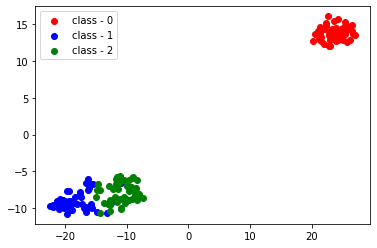

In [87]:
model_ak3 = TSNE(n_components=2, metric= 'correlation')
x_tsne3 = model_ak3.fit_transform(x)

plt.scatter(x_tsne3[0:50, 0], x_tsne3[0:50, 1], color = 'red', label="class - 0")
plt.scatter(x_tsne3[50:100, 0], x_tsne3[50:100, 1], color = 'blue', label="class - 1")
plt.scatter(x_tsne3[100:150, 0], x_tsne3[100:150, 1], color = 'green', label="class - 2")
plt.legend()

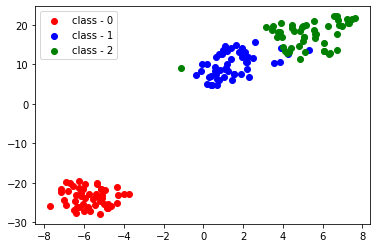

In [93]:
model_ak4 = TSNE(n_components=2, metric= 'cityblock')
x_tsne4 = model_ak4.fit_transform(x)

plt.scatter(x_tsne4[0:50, 0], x_tsne4[0:50, 1], color = 'red', label="class - 0")
plt.scatter(x_tsne4[50:100, 0], x_tsne4[50:100, 1], color = 'blue', label="class - 1")
plt.scatter(x_tsne4[100:150, 0], x_tsne4[100:150, 1], color = 'green', label="class - 2")
plt.legend()